In [ ]:
"""
2. Sentiment Analyzer
User inputs a sentence or tweet, and AI returns whether it's positive, negative, or neutral.

"""

'\n\n'

In [38]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict, Literal
from pydantic import BaseModel, Field

In [39]:
load_dotenv()
llm = ChatOpenAI(model='gpt-3.5-turbo')

In [40]:
class SentimentSchema(BaseModel):
    sentiment: Literal['positive', 'negative', 'neutral'] = Field(description='sentiment of the review')

In [42]:
structured_llm = llm.with_structured_output(SentimentSchema)

In [43]:
class SentimentAnalyzerState(TypedDict):
    sentence: str
    response: Literal['positive', 'negative', 'neutral']

In [44]:

def analyzer(state: SentimentAnalyzerState):
    # extract sentence from state
    sentence = state['sentence']

    # prompt
    prompt = f"Determine the sentiment (positive, negative, or neutral) of the following sentence or tweet:\n\n{sentence}"

    # llm
    response = structured_llm.invoke(prompt)

    return {'response': response.sentiment}


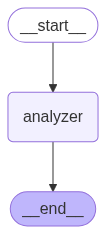

In [45]:
# graph
graph = StateGraph(SentimentAnalyzerState)

# nodes
graph.add_node('analyzer', analyzer)

# edges
graph.add_edge(START, 'analyzer')
graph.add_edge('analyzer', END)

# compile
workflow = graph.compile()
workflow

In [49]:
initial_state = {
    "sentence": "I used the lending app but this was a bad experience"
}
result = workflow.invoke(initial_state)
print(result['response'])

negative


In [50]:
initial_state = {
    "sentence": "I used the lending app but this was so good experience"
}
result = workflow.invoke(initial_state)
print(result['response'])

positive
